# Introduction to NN

**Agenda**

1. Simple computational graph

2. Example of gradient descent

3. Logistic Regression from scratch

4. Introduction to deep learning frameworks (PyTorch)

<h1>----------------------------------------------------------------------------------------------------------------</h1>

# 1. Simple computational graph

In [27]:
# Import functions
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

To create computational graph we will use networkx package. Documenation is here: https://networkx.org/documentation/stable/tutorial.html

Create computational graph for given function

$$f(x)=x^2+1$$

In [28]:
G = nx.Graph()

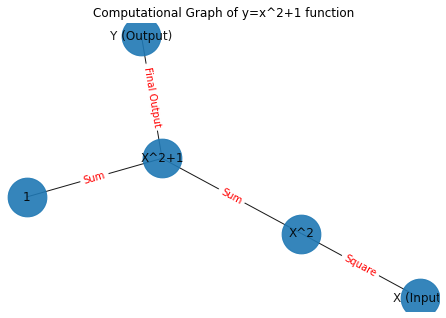

In [29]:
G.add_node('X (Input)')
G.add_node('X^2')
G.add_node(1)
G.add_node('Y (Output)')
G.add_node('X^2+1')

G.add_edge('X (Input)', 'X^2')
G.add_edge(1, 'X^2+1')
G.add_edge('X^2', 'X^2+1')
G.add_edge('X^2+1', 'Y (Output)')


pos = nx.spring_layout(G)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=1500,  alpha=0.9,
    labels={node: node for node in G.nodes()}
)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('X (Input)', 'X^2'): 'Square',
                 (1, 'X^2+1'): 'Sum',
                 ('X^2', 'X^2+1'): 'Sum',
                 ('X^2+1', 'Y (Output)'): 'Final Output'},
    font_color='red'
)

plt.title("Computational Graph of y=x^2+1 function")
plt.show()

# 2. Example of gradient descent

$\text{Defining function: } \text{f(x)} = x^2 + 1$

In [30]:
def myfun(x):
    return x**2+1

Creating graph of the given function for a small interval

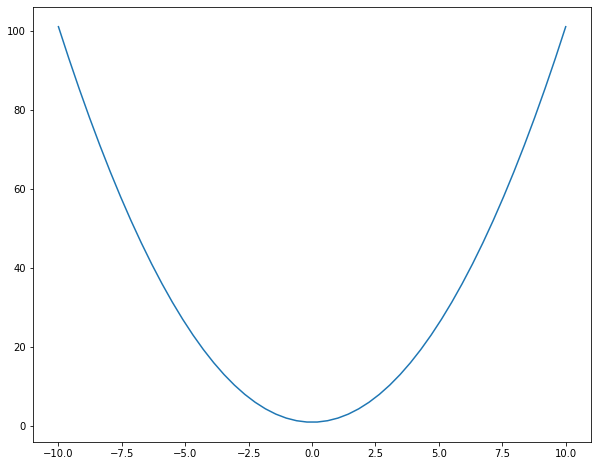

In [31]:
# setting the interval
x_int = np.linspace(-10, 10)
y_int = myfun(x_int)

# plotting
plt.figure(figsize=(10, 8))
plt.plot(x_int, y_int)
plt.show()

##### Q1: What can we say about the function when looking at the graph?
##### Q2: How to find the minima of this function?

<br>
<br>
Next, we are going to implement the Gradient Decent algorithm to find the minima . So in order to conduct decent gradient, we need to find the derivatives of a given function. Let's do that:


In [32]:
def deriv(x):
    return 2*x

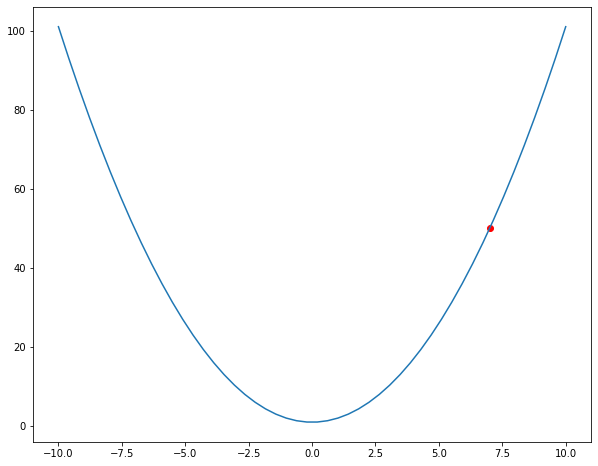

In [33]:
# initializing a random point, say x = 7
x_0 = 7
y_0 = myfun(x_0)

# plotting
plt.figure(figsize=(10, 8))
plt.plot(x_int, y_int)
plt.scatter(x_0, y_0, c='red')
plt.show()

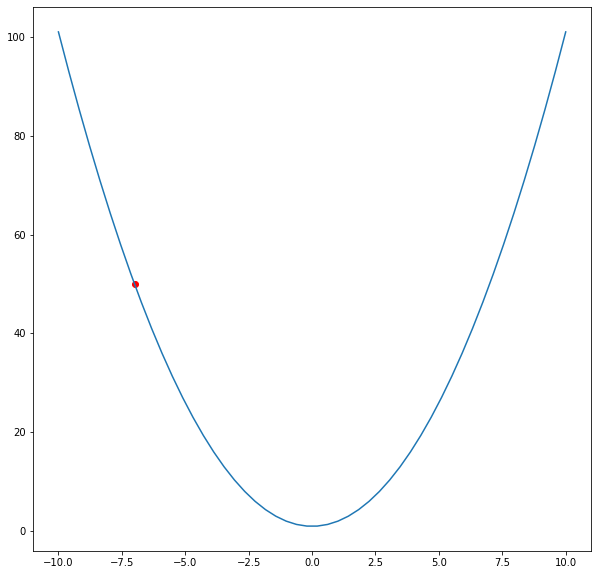

In [34]:
# calculating the gradient of the function in that point (x_0)
grad_1 = deriv(x_0)

# moving in the opposite direction of the gradient (its sign basically) to find a local minimum
x_1 = x_0 - grad_1
y_1 = myfun(x_1)

# plotting again
plt.figure(figsize=(10, 10))
plt.plot(x_int, y_int)
plt.scatter(x_1, y_1, c='red')
plt.show()

-7


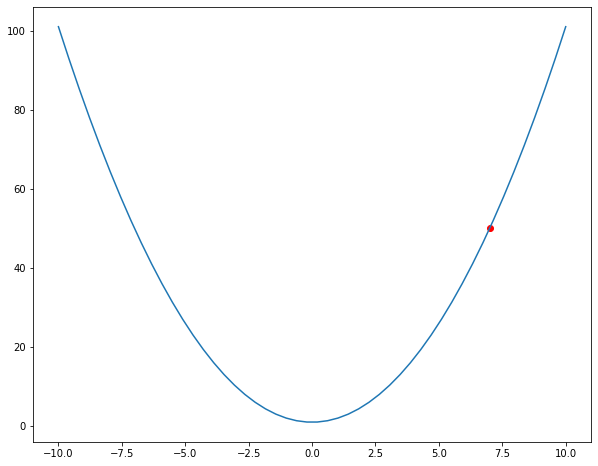

In [35]:
# repeating the same steps again
print(x_1)
# calculating the gradient of the function in that point (x_1)
grad_2 = deriv(x_1)

# moving in the opposite direction of the gradient (its sign basically) to find a local minimum
x_2 = x_1 - grad_2
y_2 = myfun(x_2)

# plotting again
plt.figure(figsize=(10, 8))
plt.plot(x_int, y_int)
plt.scatter(x_2, y_2, c='red')
plt.show()

As we can see, after gradient decent updates, the red dot jumps from side to side without reaching the minima. What we can do?

7
5.6


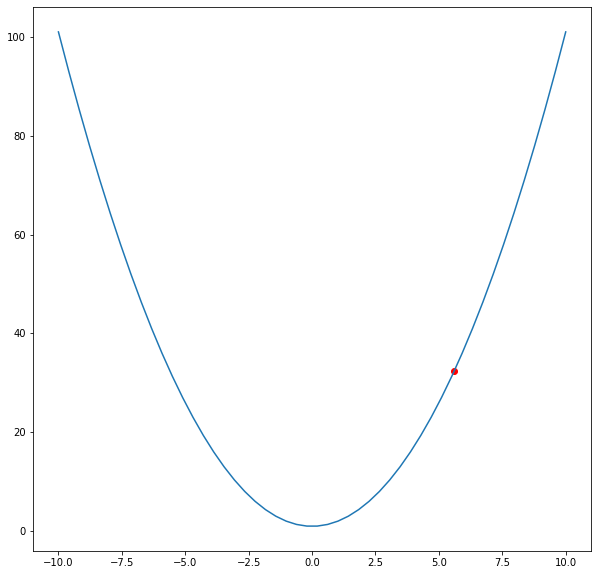

In [36]:
# repeating the same steps again but with alpha
print(x_2)
alpha = 0.1

# calculating the gradient of the function in that point (x_2)
grad_3 = deriv(x_2)

# moving in the opposite direction of the gradient (its sign basically) to find a local minimum
x_3 = x_2 - alpha*grad_3
y_3 = myfun(x_3)
print(x_3)
#plotting again
plt.figure(figsize=(10,10))
plt.plot(x_int,y_int)
plt.scatter(x_3,y_3, c = 'red')
plt.show()

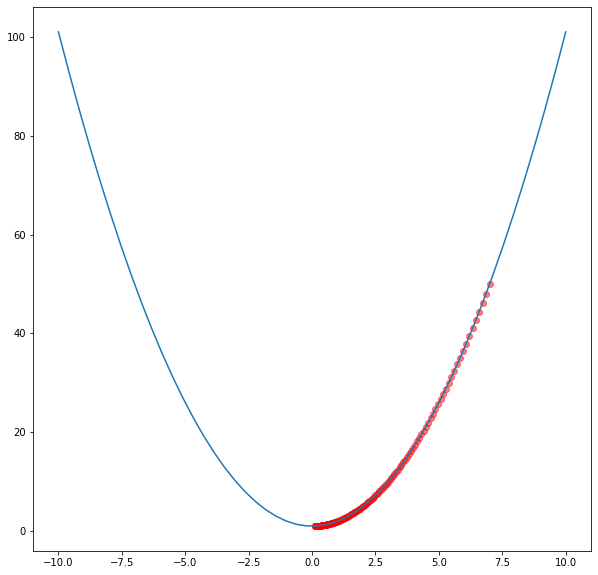

In [37]:
# repeating the same steps again with alpha (100 iterations) starting from x_0
itera = 200
alpha = 0.01
x = np.zeros(itera)

x[0] = 7
for i in range(itera-1):
    x[i+1] = x[i]-alpha * deriv(x[i])
y = myfun(x)

# plotting again
plt.figure(figsize=(10, 10))
plt.plot(x_int, y_int)
plt.scatter(x, y, c='red', alpha=0.5)
plt.show()

**Homework TODO**
- Define the following function: f(x) = x^2 + x^4 + 4 
- Draw a graph of the function
- Define derivative of this function
- Implement gradient descent and draw a graph with gradiends
- Let's discuss the results, what can be done to improve the results

# 3. Logistic Regression from scratch

We are now going to implement logistic regression from scratch using only the numpy package.

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv("cancer.csv")

In [40]:
data.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To make computations fast lets select only two parameters from the dataset for example radius mean and texture mean and take diagnosis as label

In [41]:
X = np.array(data[["radius_mean", "texture_mean"]])

In [42]:
Y = np.array(data[["diagnosis"]])

Next, we are going to initialize the random weights. In classic machine learning literature, we often refer to them as coefficients (b0, b1...). In the deep learning literature, we will call coefficients bias and weights.

In [43]:
W = np.random.uniform(low=-0.01, high=0.01, size=(2,))
b = np.random.uniform(low=-0.01, high=0.01, size=(1,))
print(W)
print(b)

[-0.00347271 -0.00311913]
[0.0080813]


In [44]:
# Converting strings to numeric values so we can pass it to the model. For this case we have only two classes so it will be binary
Y = np.array ([[1,0] if i[0]=="M" else [0,1] for i in Y])
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

Next, we will define the main function wich will help us to create logistic regression.

In [45]:
# Linear function
def linear(x, w, b):
    return np.sum(x*w, axis=1) + b

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [46]:
# Let's test it
prediction = sigmoid(linear(X, W, b))
prediction

array([0.47832129, 0.47034006, 0.46839773, 0.4762317 , 0.47324851,
       0.47898133, 0.47062989, 0.4738985 , 0.47374334, 0.47248469,
       0.47002597, 0.47439261, 0.4660909 , 0.46962139, 0.47249716,
       0.46796576, 0.47360303, 0.47192031, 0.46759505, 0.47907976,
       0.47842759, 0.48407407, 0.4775978 , 0.4657373 , 0.47092626,
       0.47437382, 0.47260106, 0.47010865, 0.46907165, 0.47505147,
       0.46631694, 0.47717505, 0.4685862 , 0.4647085 , 0.47409733,
       0.4706852 , 0.47273899, 0.47636202, 0.46939414, 0.47410542,
       0.47354904, 0.47588416, 0.46616956, 0.47469857, 0.47360394,
       0.47213356, 0.48178128, 0.47605403, 0.480161  , 0.47294592,
       0.47498815, 0.47745205, 0.47744637, 0.47165065, 0.4717701 ,
       0.47741339, 0.47089503, 0.47244189, 0.47565229, 0.48534894,
       0.48159612, 0.47820971, 0.47240469, 0.48325502, 0.47244976,
       0.47055479, 0.47743513, 0.47736966, 0.48067755, 0.47808047,
       0.46899971, 0.48289463, 0.46801117, 0.47774144, 0.47846

In [47]:
# Loss function
def cross_entropy(y_hat, y):
    return np.mean(-y[:, 0]*np.log(y_hat) - y[:, 1]*np.log(1-y_hat))

In [48]:
# Let's test it
cross_entropy(prediction, Y)

0.688598487991218

In [49]:
# Derivative Calculation
def compute_derivative(input, prediction, labels):
    m = len(prediction)
    w_deriv = (input.T @ (prediction - labels[:, 0])) / m
    b_deriv = np.sum(prediction - labels[:, 0])/m

    return w_deriv, b_deriv


# Let's test it
w_deriv, b_deriv = compute_derivative(X, prediction, Y)
print(f'Derivative of weights: {w_deriv} \nDerivative of bias: {b_deriv}')

Derivative of weights: [0.18586151 1.08929985] 
Derivative of bias: 0.10215451774041484


In [50]:
def train_logistic(iteration, lr, input, labels, weights, bias):

    losses = []
    for i in range(iteration):
        y_hat = sigmoid(linear(input, weights, bias))
        loss = cross_entropy(y_hat, labels)
        losses.append(loss)
        w_deriv, b_deriv = compute_derivative(input, y_hat, labels)
        weights = weights - (lr*w_deriv)
        bbias = bias - (lr*b_deriv)
        if i % 50 == 0:
            print(f'Iteration {i} loss:', loss)

    # visualize
    plt.figure()
    plt.plot(range(len(losses)), losses, 'r')
    plt.title("Convergence Graph of Loss Function")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()

Iteration 0 loss: 0.688598487991218
Iteration 50 loss: 0.6745295277259095
Iteration 100 loss: 0.6660790319268747
Iteration 150 loss: 0.6594090986808858
Iteration 200 loss: 0.6541233162148938
Iteration 250 loss: 0.6499152578361583
Iteration 300 loss: 0.6465492238080667
Iteration 350 loss: 0.6438440246454585
Iteration 400 loss: 0.6416600675388074
Iteration 450 loss: 0.6398893851628676
Iteration 500 loss: 0.6384480618657475
Iteration 550 loss: 0.6372705248960304
Iteration 600 loss: 0.6363052510555878
Iteration 650 loss: 0.6355115340468559
Iteration 700 loss: 0.6348570424042386
Iteration 750 loss: 0.6343159661523768
Iteration 800 loss: 0.633867602718751
Iteration 850 loss: 0.6334952717930789
Iteration 900 loss: 0.6331854777103391
Iteration 950 loss: 0.6329272591030742
Iteration 1000 loss: 0.6327116810557223
Iteration 1050 loss: 0.6325314363369242
Iteration 1100 loss: 0.6323805306186968
Iteration 1150 loss: 0.6322540327385625
Iteration 1200 loss: 0.6321478756179563
Iteration 1250 loss: 0.63

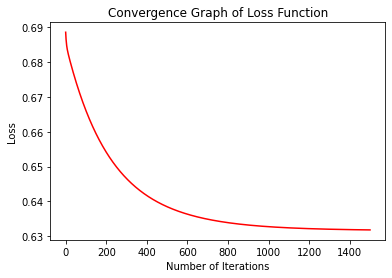

In [51]:
train_logistic(iteration=1501, lr=0.001, input=X, labels=Y, weights=W, bias=b)

**TODO Homework**

To make sure that you will not just copy this script you have to write your own class for logistic regression and test algorithm on any data that you want using different learning rates, weights and number of iterations.

# 4. Introduction to deep learning frameworks (PyTorch)

**Why PyTorch?**

* PyThonic - easy to use
* Strong GPU suport
* Many Algorithms are already implemented
* Strong OOP support that makes natural choice for many companies
* Automatic differntiation 
* Similar to numpy
* Because. 

In [52]:
import torch

## 4.1 Similarities with Numpy

###  4.1.1 Arrays and Random Variables

**Arrays**

In [53]:
torch.tensor([[2, 3, 5], [1, 2, 9]])

tensor([[2, 3, 5],
        [1, 2, 9]])

In [54]:
np.array([[2, 3, 5], [1, 2, 9]])

array([[2, 3, 5],
       [1, 2, 9]])

**Random Variables**

In [55]:
torch.rand(2, 2)

tensor([[0.2237, 0.0879],
        [0.4124, 0.7772]])

In [56]:
np.random.rand(2, 2)

array([[0.16128416, 0.71597557],
       [0.8571421 , 0.50222291]])

In [57]:
a = torch.rand(3, 5)
a.shape

torch.Size([3, 5])

In [58]:
a = np.random.randn(3, 5)
a.shape

(3, 5)

### 4.1.2 Matrix Multiplication

In [59]:
a = torch.rand((2, 2))
b = torch.rand((2, 2))

In [60]:
print(a)
print(b)

tensor([[0.0392, 0.9695],
        [0.3943, 0.6042]])
tensor([[0.8847, 0.3013],
        [0.5361, 0.8209]])


In [61]:
torch.matmul(a, b)

tensor([[0.5544, 0.8077],
        [0.6728, 0.6148]])

In [62]:
a = np.random.rand(2, 2)
b = np.random.rand(2, 2)

In [63]:
np.dot(a, b)

array([[0.76131906, 0.66546167],
       [0.02234025, 0.01638035]])

### 4.1.3 Element wise multiplication

In [64]:
a = torch.rand((2, 2))
b = torch.rand((2, 2))

In [65]:
print(a)
print(b)

tensor([[0.1236, 0.3955],
        [0.7330, 0.1847]])
tensor([[0.5374, 0.9536],
        [0.6666, 0.2010]])


In [66]:
a*b

tensor([[0.0664, 0.3772],
        [0.4886, 0.0371]])

In [67]:
a = np.random.rand(2, 2)
b = np.random.rand(2, 2)

In [68]:
np.multiply(a, b)

array([[0.2684031 , 0.03919574],
       [0.10879225, 0.13284311]])

### 4.1.4 Ones and Zeros

In [69]:
a_torch = torch.zeros(2, 2)
a_torch

tensor([[0., 0.],
        [0., 0.]])

In [70]:
b_torch = torch.ones(2, 2)
b_torch

tensor([[1., 1.],
        [1., 1.]])

In [71]:
c_torch = torch.eye(2)
c_torch

tensor([[1., 0.],
        [0., 1.]])

In [72]:
a_numpy = np.zeros((2, 2))
a_numpy

array([[0., 0.],
       [0., 0.]])

In [73]:
b_numpy = np.ones((2, 2))
b_numpy

array([[1., 1.],
       [1., 1.]])

In [74]:
c_numpy = np.identity(2)
c_numpy

array([[1., 0.],
       [0., 1.]])

### 4.1.5 PyTorchtoNumPyandviceversa

In [75]:
d_torch = torch.from_numpy(c_numpy)

In [76]:
d_torch

tensor([[1., 0.],
        [0., 1.]], dtype=torch.float64)

In [77]:
d = c_torch.numpy()

In [78]:
d

array([[1., 0.],
       [0., 1.]], dtype=float32)

### Summary

* torch.matmul(a, b) multiples torch tensors a and b
* \* element-wise multiplication between two torch tensors
* torch.eye(n) creates an identity torch tensor with shape (n, n)
* torch.zeros(n, m) creates a torch tensor of zeros with shape (n, m)
* torch.ones(n, m) creates a torch tensor of ones with shape (n, m)
* torch.rand(n, m) creates a random torch tensor with shape (n, m)
* torch.tensor(l) creates a torch tensor based on list l

**TODO Implement logistic regression from scratch using pytorch** 

In [79]:
import torch
import numpy as np

class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [80]:
def train(model, criterion, optimizer, x_train, y_train, num_epochs):
    for epoch in range(num_epochs):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))

In [81]:
x_train = torch.tensor(np.random.randn(100, 2), dtype=torch.float32)
y_train = torch.tensor(np.random.randint(0, 2, size=(100, 1)), dtype=torch.float32)

In [82]:
input_size = 2
learning_rate = 0.01
num_epochs = 1000

model = LogisticRegression(input_size=input_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [83]:
train(model, criterion, optimizer, x_train, y_train, num_epochs)

Epoch [100/1000], Loss: 0.7038
Epoch [200/1000], Loss: 0.6955
Epoch [300/1000], Loss: 0.6900
Epoch [400/1000], Loss: 0.6862
Epoch [500/1000], Loss: 0.6838
Epoch [600/1000], Loss: 0.6821
Epoch [700/1000], Loss: 0.6810
Epoch [800/1000], Loss: 0.6803
Epoch [900/1000], Loss: 0.6798
Epoch [1000/1000], Loss: 0.6795


In [84]:
x_test = torch.tensor(np.random.randn(10, 2), dtype=torch.float32)

# Make predictions on the test data
with torch.no_grad():
    y_pred = model(x_test)
    predictions = (y_pred > 0.5).float()

# Print the predictions
print('Test Predictions:\n', predictions)

Test Predictions:
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
